In [ ]:
!pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)


In [ ]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving ML_preprocess_data_v2.csv to ML_preprocess_data_v2 (1).csv
User uploaded file "ML_preprocess_data_v2.csv" with length 18012281 bytes


In [ ]:
df=pd.read_csv('ML_preprocess_data_v2.csv')

In [ ]:
df.head(5)

,Target,Enrollment,Gender,StudyType,FundedBys_Others,FundedBys_Industries,FundedBys_NIH,FundedBys_USA_FED,StudyDesign1,StudyDesign2,StudyDesign3,StudyDesign4,StudyDesign5,StudyDesign6,StudyDesign7,StudyDesign8,StudyDesign9,StudyDesign10,StudyDesign11,StudyDesign12,StudyDesign13,StudyDesign14,StudyDesign15,StudyDesign16,StudyDesign17,StudyDesign18,StudyDesign19,StudyDesign20,StudyDesign21,StudyDesign22,StudyDesign23,StudyDesign24,StudyDesign25,StudyDesign26,StudyDesign27,StudyDesign28,StudyDesign29,StudyDesign30,StudyDesign31,StudyDesign32,...,StudyDesign56,BasicScience,DeviceFeasibility,Diagnostic,Health Services Research,Other,Prevention,Screening,SupportiveCare,PrimaryPurposeMissing,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
0,1,7.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,1,0.002222,0.002222,0.002222,0.002222,0.086691,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.110866,0.002222,0.002222,0.305871,0.002222,0.275135,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.165881
1,1,1.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,1,0.561842,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.334454,0.003704,0.003704
2,1,100.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,1,0.003333,0.003333,0.003333,0.675079,0.231588,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333
3,0,12.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,1,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.451532,0.004167,0.004167,0.004167,0.004167,0.431802,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167
4,1,99.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0,0,0,0,0,0,0,0,1,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.172236,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.505542,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.172222,0.005556,0.005556,0.005556


In [ ]:
X=df.loc[:,df.columns != 'Target']  # All the features 
y=df['Target']   #  Target variables
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,test_size=0.30)

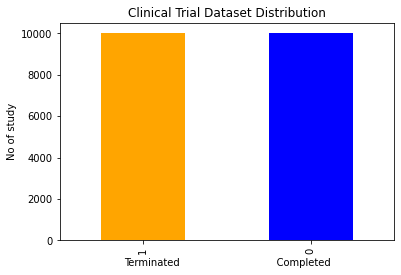

In [ ]:
color=['orange','blue']
df['Target'].value_counts().plot(kind='bar',color=color)
plt.xlabel("Terminated                               Completed")
plt.ylabel("No of study")
plt.title("Clinical Trial Dataset Distribution")
plt.show()

In [ ]:
print(X_train.shape)

(14000, 102)


#define the model with keras layer by layer
keras_model=keras.Sequential()
#First hidden layer
keras_model.add(Dense(40,input_dim=93,activation='relu'))
keras_model.add(Dense(20,activation='relu'))
keras_model.add(Dense(1,activation='sigmoid'))              

In [ ]:
keras_model=keras.Sequential()
#First hidden layer
keras_model.add(Dense(18,input_dim=102,activation='relu'))
keras_model.add(Dense(12,activation='relu'))
keras_model.add(Dense(6,activation='relu'))

In [ ]:
keras_model.add(Dense(4,activation='sigmoid'))

In [ ]:
keras_model.add(Dense(1,activation='sigmoid'))

In [ ]:
#Compiling the model
keras_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#fitting the model
history=keras_model.fit(X_train,y_train,epochs=50,batch_size=10)

Epoch 1/50
1400/1400 [==============================] - 2s 1ms/step - loss: 0.6138 - accuracy: 0.6612
Epoch 2/50
1400/1400 [==============================] - 2s 1ms/step - loss: 0.5352 - accuracy: 0.7427
Epoch 3/50
1400/1400 [==============================] - 2s 1ms/step - loss: 0.4975 - accuracy: 0.7655
Epoch 4/50
1400/1400 [==============================] - 2s 1ms/step - loss: 0.4847 - accuracy: 0.7743
Epoch 5/50
1400/1400 [==============================] - 2s 1ms/step - loss: 0.4642 - accuracy: 0.7826
Epoch 6/50
1400/1400 [==============================] - 2s 1ms/step - loss: 0.4680 - accuracy: 0.7835
Epoch 7/50
1400/1400 [==============================] - 2s 1ms/step - loss: 0.4633 - accuracy: 0.7834
Epoch 8/50
1400/1400 [==============================] - 2s 1ms/step - loss: 0.4582 - accuracy: 0.7884
Epoch 9/50
1400/1400 [==============================] - 2s 1ms/step - loss: 0.4841 - accuracy: 0.7759
Epoch 10/50
1400/1400 [==============================] - 2s 1ms/step - loss: 0.450

In [ ]:
#Train Accuracy
_,accuracy=keras_model.evaluate(X_train,y_train)
acc=accuracy*100
print("Train Accuracy=", acc)

438/438 [==============================] - 1s 874us/step - loss: 0.3964 - accuracy: 0.8213
Train Accuracy= 82.12857246398926


In [ ]:
y_pred=keras_model.predict_classes(X_test)
test_acc=accuracy_score(y_test,y_pred)
print("Test Accuracy=",test_acc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Test Accuracy= 0.7946666666666666


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[2546  452]
 [ 780 2222]]


In [ ]:
y_pred_keras = keras_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [ ]:
auc_keras = auc(fpr_keras, tpr_keras)

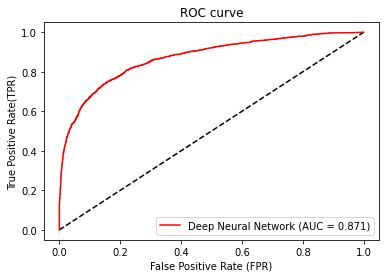

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Deep Neural Network (AUC = {:.3f})'.format(auc_keras),color='red')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.84      0.81      2998
           1       0.83      0.75      0.79      3002

    accuracy                           0.80      6000
   macro avg       0.80      0.80      0.80      6000
weighted avg       0.80      0.80      0.80      6000



In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      2998
           1       0.83      0.74      0.78      3002

    accuracy                           0.79      6000
   macro avg       0.80      0.79      0.79      6000
weighted avg       0.80      0.79      0.79      6000



In [ ]:
h=confusion_matrix(y_test, y_pred)

In [ ]:
h

array([[2531,  467],
       [ 739, 2263]], dtype=int64)

In [ ]:
h

array([[2546,  452],
       [ 780, 2222]])

In [ ]:
TP=h[0,0]
FN=h[0,1]
FP=h[1,0]
TN=h[1,1]

In [ ]:
h=TP+TN+FP+FN
k=TP+TN
pt=TP+FP
rt2=TP+FN
r=TP/pt
p=TP/rt2
t=r+p

In [ ]:
F1_score=2*(r*p)/t
print("F1_score=",F1_score)

F1_score= 0.8051865907653385


In [ ]:
F1_score=2*(r*p)/t
print("F1_score=",F1_score)

F1_score= 0.8075941289087429


In [ ]:
acc=(k/h)*100
print("Accuracy=",acc)

Accuracy= 79.9


In [ ]:
acc=(k/h)*100
print("Accuracy=",acc)

Accuracy= 79.46666666666667


In [ ]:
#!pip install --upgrade plotly

     |████████████████████████████████| 13.2MB 266kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
df2 = pd.DataFrame (y_pred,columns=['Prediction'])
df2

,Prediction
0,0
1,1
2,1
3,0
4,0
...,...
5995,0
5996,0
5997,0
5998,1


In [ ]:
df3 = X_test.loc[:, 'BasicScience':'Topic_29']
df3 = df3.reset_index(drop=True)
df3

,BasicScience,DeviceFeasibility,Diagnostic,Health Services Research,Other,Prevention,Screening,SupportiveCare,PrimaryPurposeMissing,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
0,0,0,0,0,0,0,0,0,1,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.459315,0.354018,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667
1,0,0,0,0,0,1,0,0,0,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.702299,0.003333,0.204368,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333
2,0,0,0,0,0,0,0,0,1,0.003030,0.003030,0.003030,0.003030,0.663314,0.003030,0.003030,0.251838,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030
3,0,0,0,1,0,0,0,0,0,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.172222,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.338889,0.005556,0.005556,0.338889,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556
4,1,0,0,0,0,0,0,0,0,0.348719,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.208567,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.084929,0.249452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,0,0,0,0,0,0,0,0,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.214637,0.006667,0.398696,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.206667,0.006667,0.006667,0.006667
5996,0,0,0,0,0,0,0,0,1,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.643713,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.200731,0.005556,0.005556,0.005556,0.005556,0.005556
5997,0,0,0,0,0,0,0,0,1,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.491418,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.391916,0.004167,0.004167,0.004167,0.004167,0.004167
5998,1,0,0,0,0,0,0,0,0,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.219719,0.006667,0.006667,0.006667,0.006667,0.593615,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667


In [ ]:
df4 = pd.concat([df2,df3], axis=1)

In [ ]:
df4

,Prediction,BasicScience,DeviceFeasibility,Diagnostic,Health Services Research,Other,Prevention,Screening,SupportiveCare,PrimaryPurposeMissing,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
0,0,0,0,0,0,0,0,0,0,1,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.459315,0.354018,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667
1,1,0,0,0,0,0,1,0,0,0,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.702299,0.003333,0.204368,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333
2,1,0,0,0,0,0,0,0,0,1,0.003030,0.003030,0.003030,0.003030,0.663314,0.003030,0.003030,0.251838,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030
3,0,0,0,0,1,0,0,0,0,0,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.172222,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.338889,0.005556,0.005556,0.338889,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556
4,0,1,0,0,0,0,0,0,0,0,0.348719,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.208567,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.084929,0.249452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,1,0,0,0,0,0,0,0,0,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.214637,0.006667,0.398696,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.206667,0.006667,0.006667,0.006667
5996,0,0,0,0,0,0,0,0,0,1,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.643713,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.200731,0.005556,0.005556,0.005556,0.005556,0.005556
5997,0,0,0,0,0,0,0,0,0,1,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.491418,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.391916,0.004167,0.004167,0.004167,0.004167,0.004167
5998,1,1,0,0,0,0,0,0,0,0,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.219719,0.006667,0.006667,0.006667,0.006667,0.593615,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667


In [ ]:
df5 = df4.loc[(df4['Prediction']==1)]

In [ ]:
df5

,Prediction,BasicScience,DeviceFeasibility,Diagnostic,Health Services Research,Other,Prevention,Screening,SupportiveCare,PrimaryPurposeMissing,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
1,1,0,0,0,0,0,1,0,0,0,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.702299,0.003333,0.204368,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333
2,1,0,0,0,0,0,0,0,0,1,0.003030,0.003030,0.003030,0.003030,0.663314,0.003030,0.003030,0.251838,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030
6,1,0,0,0,0,0,0,0,0,1,0.002222,0.002222,0.002222,0.420634,0.253037,0.051808,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.216743,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222
8,1,0,0,0,0,0,0,0,0,1,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.116184,0.003333,0.003333,0.003333,0.003333,0.003333,0.341404,0.003333,0.003333,0.003333,0.245185,0.003333,0.003333,0.003333,0.117648,0.096245,0.003333,0.003333,0.003333,0.003333,0.003333
9,1,0,0,0,0,0,0,0,0,1,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.838889,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5991,1,0,0,0,0,0,0,0,0,1,0.011111,0.011111,0.011111,0.011111,0.677778,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111
5992,1,0,0,0,0,0,0,0,0,1,0.168410,0.002778,0.002778,0.002778,0.002778,0.002778,0.153795,0.002778,0.002778,0.203179,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.225365,0.002778,0.002778,0.002778,0.002778,0.002778,0.179807,0.002778,0.002778
5993,1,0,0,0,0,0,0,0,0,1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.758333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
5994,1,0,0,0,0,0,0,0,0,1,0.003030,0.003030,0.277506,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.101669,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.393136,0.003030,0.148901,0.003030,0.003030,0.003030,0.003030,0.003030


In [ ]:
dfBS = df5.groupby(['BasicScience']).agg({'Topic_0':'mean',
                                   'Topic_1':'mean',
                                   'Topic_2':'mean',
                                   'Topic_3':'mean',
                                   'Topic_4':'mean',
                                   'Topic_5':'mean',
                                   'Topic_6':'mean',
                                   'Topic_7':'mean',
                                   'Topic_8':'mean',
                                   'Topic_9':'mean',
                                   'Topic_10':'mean',
                                   'Topic_11':'mean',
                                   'Topic_12':'mean',
                                   'Topic_13':'mean',
                                   'Topic_14':'mean',
                                   'Topic_15':'mean',
                                   'Topic_16':'mean',
                                   'Topic_17':'mean',
                                   'Topic_18':'mean',
                                   'Topic_19':'mean',
                                   'Topic_20':'mean',
                                   'Topic_21':'mean',
                                   'Topic_22':'mean',
                                   'Topic_23':'mean',
                                   'Topic_24':'mean',
                                   'Topic_25':'mean',
                                   'Topic_26':'mean',
                                   'Topic_27':'mean',
                                   'Topic_28':'mean',
                                   'Topic_29':'mean'})
dfBS = dfBS.loc[[1]]
dfBS = dfBS.reset_index(drop=True)
dfBS

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
0,0.010859,0.032773,0.022913,0.055755,0.038584,0.056608,0.058655,0.027114,0.056567,0.028935,0.038907,0.012314,0.028055,0.054605,0.03449,0.024966,0.04637,0.021978,0.061851,0.013129,0.012028,0.012621,0.024785,0.028771,0.030298,0.016892,0.037004,0.035429,0.024313,0.052429


In [ ]:
dfDF = df5.groupby(['DeviceFeasibility']).agg({'Topic_0':'mean',
                                   'Topic_1':'mean',
                                   'Topic_2':'mean',
                                   'Topic_3':'mean',
                                   'Topic_4':'mean',
                                   'Topic_5':'mean',
                                   'Topic_6':'mean',
                                   'Topic_7':'mean',
                                   'Topic_8':'mean',
                                   'Topic_9':'mean',
                                   'Topic_10':'mean',
                                   'Topic_11':'mean',
                                   'Topic_12':'mean',
                                   'Topic_13':'mean',
                                   'Topic_14':'mean',
                                   'Topic_15':'mean',
                                   'Topic_16':'mean',
                                   'Topic_17':'mean',
                                   'Topic_18':'mean',
                                   'Topic_19':'mean',
                                   'Topic_20':'mean',
                                   'Topic_21':'mean',
                                   'Topic_22':'mean',
                                   'Topic_23':'mean',
                                   'Topic_24':'mean',
                                   'Topic_25':'mean',
                                   'Topic_26':'mean',
                                   'Topic_27':'mean',
                                   'Topic_28':'mean',
                                   'Topic_29':'mean'})
dfDF = dfDF.loc[[1]]
dfDF

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
DeviceFeasibility,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.004569,0.040835,0.011739,0.024393,0.049747,0.004569,0.040605,0.016353,0.036136,0.004569,0.004569,0.05637,0.050024,0.004569,0.04297,0.004569,0.025248,0.046144,0.015192,0.055423,0.004569,0.063949,0.018047,0.027881,0.070327,0.025095,0.004569,0.179495,0.016293,0.051179


In [ ]:
dfD = df5.groupby(['Diagnostic']).agg({'Topic_0':'mean',
                                   'Topic_1':'mean',
                                   'Topic_2':'mean',
                                   'Topic_3':'mean',
                                   'Topic_4':'mean',
                                   'Topic_5':'mean',
                                   'Topic_6':'mean',
                                   'Topic_7':'mean',
                                   'Topic_8':'mean',
                                   'Topic_9':'mean',
                                   'Topic_10':'mean',
                                   'Topic_11':'mean',
                                   'Topic_12':'mean',
                                   'Topic_13':'mean',
                                   'Topic_14':'mean',
                                   'Topic_15':'mean',
                                   'Topic_16':'mean',
                                   'Topic_17':'mean',
                                   'Topic_18':'mean',
                                   'Topic_19':'mean',
                                   'Topic_20':'mean',
                                   'Topic_21':'mean',
                                   'Topic_22':'mean',
                                   'Topic_23':'mean',
                                   'Topic_24':'mean',
                                   'Topic_25':'mean',
                                   'Topic_26':'mean',
                                   'Topic_27':'mean',
                                   'Topic_28':'mean',
                                   'Topic_29':'mean'})
dfD = dfD.loc[[1]]
dfD = dfD.rename(index={1: 2})
dfD

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
Diagnostic,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0.022393,0.024686,0.00723,0.069854,0.023886,0.017303,0.076632,0.055093,0.157341,0.025989,0.026559,0.020416,0.025984,0.016397,0.014866,0.021322,0.029824,0.006278,0.031535,0.0208,0.009657,0.023038,0.027169,0.074328,0.02852,0.013228,0.022417,0.042991,0.039066,0.025201


In [ ]:
dfHSR = df5.groupby(['Health Services Research']).agg({'Topic_0':'mean',
                                   'Topic_1':'mean',
                                   'Topic_2':'mean',
                                   'Topic_3':'mean',
                                   'Topic_4':'mean',
                                   'Topic_5':'mean',
                                   'Topic_6':'mean',
                                   'Topic_7':'mean',
                                   'Topic_8':'mean',
                                   'Topic_9':'mean',
                                   'Topic_10':'mean',
                                   'Topic_11':'mean',
                                   'Topic_12':'mean',
                                   'Topic_13':'mean',
                                   'Topic_14':'mean',
                                   'Topic_15':'mean',
                                   'Topic_16':'mean',
                                   'Topic_17':'mean',
                                   'Topic_18':'mean',
                                   'Topic_19':'mean',
                                   'Topic_20':'mean',
                                   'Topic_21':'mean',
                                   'Topic_22':'mean',
                                   'Topic_23':'mean',
                                   'Topic_24':'mean',
                                   'Topic_25':'mean',
                                   'Topic_26':'mean',
                                   'Topic_27':'mean',
                                   'Topic_28':'mean',
                                   'Topic_29':'mean'})
dfHSR = dfHSR.loc[[1]]
dfHSR = dfHSR.rename(index={1: 3})
dfHSR

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
Health Services Research,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,0.025773,0.015596,0.010555,0.03457,0.039847,0.028728,0.01918,0.027528,0.03462,0.014504,0.024333,0.031955,0.024481,0.053066,0.039597,0.053248,0.029146,0.005992,0.083535,0.032265,0.009696,0.017505,0.100659,0.040111,0.040679,0.01372,0.044139,0.021401,0.005992,0.077575


In [ ]:
dfO = df5.groupby(['Other']).agg({'Topic_0':'mean',
                                   'Topic_1':'mean',
                                   'Topic_2':'mean',
                                   'Topic_3':'mean',
                                   'Topic_4':'mean',
                                   'Topic_5':'mean',
                                   'Topic_6':'mean',
                                   'Topic_7':'mean',
                                   'Topic_8':'mean',
                                   'Topic_9':'mean',
                                   'Topic_10':'mean',
                                   'Topic_11':'mean',
                                   'Topic_12':'mean',
                                   'Topic_13':'mean',
                                   'Topic_14':'mean',
                                   'Topic_15':'mean',
                                   'Topic_16':'mean',
                                   'Topic_17':'mean',
                                   'Topic_18':'mean',
                                   'Topic_19':'mean',
                                   'Topic_20':'mean',
                                   'Topic_21':'mean',
                                   'Topic_22':'mean',
                                   'Topic_23':'mean',
                                   'Topic_24':'mean',
                                   'Topic_25':'mean',
                                   'Topic_26':'mean',
                                   'Topic_27':'mean',
                                   'Topic_28':'mean',
                                   'Topic_29':'mean'})
dfO= dfO.loc[[1]]
dfO = dfO.rename(index={1: 4})
dfO

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
Other,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,0.008707,0.035893,0.02686,0.049953,0.034641,0.034634,0.033631,0.01418,0.029497,0.038015,0.045742,0.023371,0.053482,0.027693,0.071482,0.033425,0.055984,0.020203,0.045046,0.030794,0.009116,0.026362,0.036638,0.017082,0.012463,0.059005,0.030735,0.042637,0.017595,0.035137


In [ ]:
dfP = df5.groupby(['Prevention']).agg({'Topic_0':'mean',
                                   'Topic_1':'mean',
                                   'Topic_2':'mean',
                                   'Topic_3':'mean',
                                   'Topic_4':'mean',
                                   'Topic_5':'mean',
                                   'Topic_6':'mean',
                                   'Topic_7':'mean',
                                   'Topic_8':'mean',
                                   'Topic_9':'mean',
                                   'Topic_10':'mean',
                                   'Topic_11':'mean',
                                   'Topic_12':'mean',
                                   'Topic_13':'mean',
                                   'Topic_14':'mean',
                                   'Topic_15':'mean',
                                   'Topic_16':'mean',
                                   'Topic_17':'mean',
                                   'Topic_18':'mean',
                                   'Topic_19':'mean',
                                   'Topic_20':'mean',
                                   'Topic_21':'mean',
                                   'Topic_22':'mean',
                                   'Topic_23':'mean',
                                   'Topic_24':'mean',
                                   'Topic_25':'mean',
                                   'Topic_26':'mean',
                                   'Topic_27':'mean',
                                   'Topic_28':'mean',
                                   'Topic_29':'mean'})
dfP = dfP.loc[[1]]
dfP = dfP.rename(index={1: 5})
dfP

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
Prevention,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,0.039723,0.019944,0.036086,0.044488,0.021597,0.020542,0.022846,0.033337,0.030956,0.035764,0.048616,0.013237,0.034479,0.029115,0.053669,0.081638,0.02295,0.038112,0.04009,0.052661,0.014683,0.031056,0.047353,0.029878,0.023567,0.038488,0.042789,0.025632,0.014365,0.012338


In [ ]:
dfSG = df5.groupby(['Screening']).agg({'Topic_0':'mean',
                                   'Topic_1':'mean',
                                   'Topic_2':'mean',
                                   'Topic_3':'mean',
                                   'Topic_4':'mean',
                                   'Topic_5':'mean',
                                   'Topic_6':'mean',
                                   'Topic_7':'mean',
                                   'Topic_8':'mean',
                                   'Topic_9':'mean',
                                   'Topic_10':'mean',
                                   'Topic_11':'mean',
                                   'Topic_12':'mean',
                                   'Topic_13':'mean',
                                   'Topic_14':'mean',
                                   'Topic_15':'mean',
                                   'Topic_16':'mean',
                                   'Topic_17':'mean',
                                   'Topic_18':'mean',
                                   'Topic_19':'mean',
                                   'Topic_20':'mean',
                                   'Topic_21':'mean',
                                   'Topic_22':'mean',
                                   'Topic_23':'mean',
                                   'Topic_24':'mean',
                                   'Topic_25':'mean',
                                   'Topic_26':'mean',
                                   'Topic_27':'mean',
                                   'Topic_28':'mean',
                                   'Topic_29':'mean'})
dfSG = dfSG.loc[[1]]
dfSG = dfSG.rename(index={1: 6})
dfSG

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
Screening,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6,0.004968,0.04522,0.028185,0.048021,0.081204,0.004968,0.004968,0.034119,0.082345,0.004968,0.004968,0.039209,0.004968,0.004968,0.004968,0.038973,0.115675,0.020193,0.07702,0.020119,0.004968,0.071751,0.115022,0.043971,0.04436,0.004968,0.013417,0.021585,0.004968,0.004968


In [ ]:
dfS = df5.groupby(['SupportiveCare']).agg({'Topic_0':'mean',
                                   'Topic_1':'mean',
                                   'Topic_2':'mean',
                                   'Topic_3':'mean',
                                   'Topic_4':'mean',
                                   'Topic_5':'mean',
                                   'Topic_6':'mean',
                                   'Topic_7':'mean',
                                   'Topic_8':'mean',
                                   'Topic_9':'mean',
                                   'Topic_10':'mean',
                                   'Topic_11':'mean',
                                   'Topic_12':'mean',
                                   'Topic_13':'mean',
                                   'Topic_14':'mean',
                                   'Topic_15':'mean',
                                   'Topic_16':'mean',
                                   'Topic_17':'mean',
                                   'Topic_18':'mean',
                                   'Topic_19':'mean',
                                   'Topic_20':'mean',
                                   'Topic_21':'mean',
                                   'Topic_22':'mean',
                                   'Topic_23':'mean',
                                   'Topic_24':'mean',
                                   'Topic_25':'mean',
                                   'Topic_26':'mean',
                                   'Topic_27':'mean',
                                   'Topic_28':'mean',
                                   'Topic_29':'mean'})
dfS = dfS.loc[[1]]
dfS = dfS.rename(index={1: 7})
dfS

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
SupportiveCare,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,0.022738,0.045034,0.033466,0.069626,0.031055,0.01849,0.051133,0.060999,0.04368,0.019181,0.015853,0.016486,0.011093,0.019992,0.0556,0.018769,0.034104,0.032205,0.048128,0.059465,0.014401,0.009701,0.035119,0.045181,0.044802,0.017368,0.038728,0.040572,0.017335,0.029696


In [ ]:
dfM = df5.groupby(['PrimaryPurposeMissing']).agg({'Topic_0':'mean',
                                   'Topic_1':'mean',
                                   'Topic_2':'mean',
                                   'Topic_3':'mean',
                                   'Topic_4':'mean',
                                   'Topic_5':'mean',
                                   'Topic_6':'mean',
                                   'Topic_7':'mean',
                                   'Topic_8':'mean',
                                   'Topic_9':'mean',
                                   'Topic_10':'mean',
                                   'Topic_11':'mean',
                                   'Topic_12':'mean',
                                   'Topic_13':'mean',
                                   'Topic_14':'mean',
                                   'Topic_15':'mean',
                                   'Topic_16':'mean',
                                   'Topic_17':'mean',
                                   'Topic_18':'mean',
                                   'Topic_19':'mean',
                                   'Topic_20':'mean',
                                   'Topic_21':'mean',
                                   'Topic_22':'mean',
                                   'Topic_23':'mean',
                                   'Topic_24':'mean',
                                   'Topic_25':'mean',
                                   'Topic_26':'mean',
                                   'Topic_27':'mean',
                                   'Topic_28':'mean',
                                   'Topic_29':'mean'})
dfM = dfM.loc[[1]]
dfM = dfM.rename(index={1: 8})
dfM

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
PrimaryPurposeMissing,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,0.026664,0.015252,0.0604,0.067987,0.103861,0.03618,0.024746,0.022883,0.027451,0.042069,0.03298,0.018518,0.031929,0.051383,0.025004,0.028132,0.02376,0.030924,0.03255,0.033693,0.014085,0.04132,0.025293,0.02229,0.039554,0.030733,0.021761,0.029899,0.020865,0.017834


In [ ]:
#df_PPvTopic = pd.concat([dfBS, dfDF, dfD, dfHSR ,dfO ,dfP, dfS, dfM], axis=1)
df_PPvTopic = dfBS

In [ ]:
df_PPvTopic = df_PPvTopic.append(dfDF, ignore_index = True)
df_PPvTopic = df_PPvTopic.append(dfD, ignore_index = True)
df_PPvTopic = df_PPvTopic.append(dfHSR, ignore_index = True) 
df_PPvTopic = df_PPvTopic.append(dfO, ignore_index = True)
df_PPvTopic = df_PPvTopic.append(dfP, ignore_index = True)
df_PPvTopic = df_PPvTopic.append(dfSG, ignore_index = True)
df_PPvTopic = df_PPvTopic.append(dfS, ignore_index = True)
df_PPvTopic = df_PPvTopic.append(dfM, ignore_index = True)

In [ ]:
df_PPvTopic = df_PPvTopic.rename(index={0: 'BasicScience', 1:'DeviceFeasibility',2:'Diagnostic',
                                      3:'HealthServiceResearch',4:'Other',5:'Prevention',6:'Screening',
                                      7:'SupportiveCare',8:'Missing' })

In [ ]:
df_PPvTopic

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
BasicScience,0.010859,0.032773,0.022913,0.055755,0.038584,0.056608,0.058655,0.027114,0.056567,0.028935,0.038907,0.012314,0.028055,0.054605,0.034490,0.024966,0.046370,0.021978,0.061851,0.013129,0.012028,0.012621,0.024785,0.028771,0.030298,0.016892,0.037004,0.035429,0.024313,0.052429
DeviceFeasibility,0.004569,0.040835,0.011739,0.024393,0.049747,0.004569,0.040605,0.016353,0.036136,0.004569,0.004569,0.056370,0.050024,0.004569,0.042970,0.004569,0.025248,0.046144,0.015192,0.055423,0.004569,0.063949,0.018047,0.027881,0.070327,0.025095,0.004569,0.179495,0.016293,0.051179
Diagnostic,0.022393,0.024686,0.007230,0.069854,0.023886,0.017303,0.076632,0.055093,0.157341,0.025989,0.026559,0.020416,0.025984,0.016397,0.014866,0.021322,0.029824,0.006278,0.031535,0.020800,0.009657,0.023038,0.027169,0.074328,0.028520,0.013228,0.022417,0.042991,0.039066,0.025201
HealthServiceResearch,0.025773,0.015596,0.010555,0.034570,0.039847,0.028728,0.019180,0.027528,0.034620,0.014504,0.024333,0.031955,0.024481,0.053066,0.039597,0.053248,0.029146,0.005992,0.083535,0.032265,0.009696,0.017505,0.100659,0.040111,0.040679,0.013720,0.044139,0.021401,0.005992,0.077575
Other,0.008707,0.035893,0.026860,0.049953,0.034641,0.034634,0.033631,0.014180,0.029497,0.038015,0.045742,0.023371,0.053482,0.027693,0.071482,0.033425,0.055984,0.020203,0.045046,0.030794,0.009116,0.026362,0.036638,0.017082,0.012463,0.059005,0.030735,0.042637,0.017595,0.035137
Prevention,0.039723,0.019944,0.036086,0.044488,0.021597,0.020542,0.022846,0.033337,0.030956,0.035764,0.048616,0.013237,0.034479,0.029115,0.053669,0.081638,0.022950,0.038112,0.040090,0.052661,0.014683,0.031056,0.047353,0.029878,0.023567,0.038488,0.042789,0.025632,0.014365,0.012338
Screening,0.004968,0.045220,0.028185,0.048021,0.081204,0.004968,0.004968,0.034119,0.082345,0.004968,0.004968,0.039209,0.004968,0.004968,0.004968,0.038973,0.115675,0.020193,0.077020,0.020119,0.004968,0.071751,0.115022,0.043971,0.044360,0.004968,0.013417,0.021585,0.004968,0.004968
SupportiveCare,0.022738,0.045034,0.033466,0.069626,0.031055,0.018490,0.051133,0.060999,0.043680,0.019181,0.015853,0.016486,0.011093,0.019992,0.055600,0.018769,0.034104,0.032205,0.048128,0.059465,0.014401,0.009701,0.035119,0.045181,0.044802,0.017368,0.038728,0.040572,0.017335,0.029696
Missing,0.026664,0.015252,0.060400,0.067987,0.103861,0.036180,0.024746,0.022883,0.027451,0.042069,0.032980,0.018518,0.031929,0.051383,0.025004,0.028132,0.023760,0.030924,0.032550,0.033693,0.014085,0.041320,0.025293,0.022290,0.039554,0.030733,0.021761,0.029899,0.020865,0.017834


In [ ]:
import plotly.express as px


Topics = df_PPvTopic.columns.tolist()
PrimaryPurpose = df_PPvTopic.index.tolist()
fig = px.imshow(df_PPvTopic,
                labels=dict(x='Topics', y='PrimaryPurpose', color='Probability'), x=Topics ,y=PrimaryPurpose)
fig.update_xaxes(side="top")
fig.show()